<a href="https://colab.research.google.com/github/TerriDonut/Yandex-educational-projects/blob/main/linear_models_in_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Линейные модели в машинном обучении**
_____
**Описание исследования.**

Фермер, владелец молочного хозяйства «Вольный луг», хочет купить бурёнок, чтобы расширить поголовье стада коров.
Условия позволяют фермеру очень тщательно отобрать коров.

Поэтому он просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. Продавец («ЭкоФерма») готов предоставить подробные данные о своих коровах. :
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.
    
_____
**Цель исследования.**

Создать две прогнозные модели для отбора бурёнок в поголовье

1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

**Задачи исследования.**
- Загрузить и изучить предоставленные данные
- Провести предобработку
- Исследовательский анализ данных
- Корреляционный анализ признаков
- Создание и обучение модели линейной регрессии
- Создание и обуычение модели логистической регрессии
_____
**Исходные данные.**

- Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.
- Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.
- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

## Шаг1. Открытие файлов с данными и изучение общей информации

In [ ]:
#Установка phik
import sys

!"{sys.executable}" -m pip install phik -q


In [ ]:
!pip install scikit-learn==0.24.1 -q

     |████████████████████████████████| 23.8 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [ ]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import random

import phik

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
#Вызов общей информации по данным
try:
    df_main = pd.read_csv('/content/ferma_main.csv', sep=';')
    df_dad = pd.read_csv('/content/ferma_dad.csv', sep=';')
    df_buy = pd.read_csv('/content/cow_buy.csv', sep=';')
except:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

display(df_main.info())
display(df_dad.info())
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
#Переименование столбцов
df_main.columns = ['id',
                   'yield',
                   'energy_unit',
                   'raw_protein',
                   'sugar_protein',
                   'breed',
                   'pasture',
                   'dad_breed',
                   'fat',
                   'protein',
                   'taste_of_milk',
                   'age'
]
df_dad.columns = ['id', 'name_dad']
df_buy.columns = ['breed', 'pasture', 'dad_breed', 'name_dad',
                  'fat', 'protein', 'age'
]

In [ ]:
display(df_main.head(5))
display(df_dad.head(5))
df_buy.head(5)

,id,yield,energy_unit,raw_protein,sugar_protein,breed,pasture,dad_breed,fat,protein,taste_of_milk,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,name_dad
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,breed,pasture,dad_breed,name_dad,fat,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


## Шаг 2. Предобработка даных

In [ ]:
#Создаю фунцию для поиска пропусков и дубликатов
def analyze_df(df):
    print('Количество пропусков в солбцах:')
    display(df.isna().mean() * 100)

    print('Количество дубликатов в столбцах:')
    display(df.apply(lambda col: col.duplicated().sum()))

    print('Количество дубликатов в строках:')
    display(df.duplicated().sum())

In [ ]:
#Вывод количества пропусков и дубликатов в датафреймах
analyze_df(df_main)
analyze_df(df_dad)
analyze_df(df_buy)

Количество пропусков в солбцах:


id               0.0
yield            0.0
energy_unit      0.0
raw_protein      0.0
sugar_protein    0.0
breed            0.0
pasture          0.0
dad_breed        0.0
fat              0.0
protein          0.0
taste_of_milk    0.0
age              0.0
dtype: float64

Количество дубликатов в столбцах:


id                 5
yield            106
energy_unit      579
raw_protein      233
sugar_protein    622
breed            632
pasture          631
dad_breed        631
fat              584
protein          619
taste_of_milk    632
age              632
dtype: int64

Количество дубликатов в строках:


5

Количество пропусков в солбцах:


id          0.0
name_dad    0.0
dtype: float64

Количество дубликатов в столбцах:


id            0
name_dad    625
dtype: int64

Количество дубликатов в строках:


0

Количество пропусков в солбцах:


breed        0.0
pasture      0.0
dad_breed    0.0
name_dad     0.0
fat          0.0
protein      0.0
age          0.0
dtype: float64

Количество дубликатов в столбцах:


breed        18
pasture      18
dad_breed    18
name_dad     16
fat           8
protein       8
age          18
dtype: int64

Количество дубликатов в строках:


4

<b> Вывод: </b>

- Дубли вполне уместны

- Дубли строк в df_buy удалю

In [ ]:
#Контроль размера датасета
temp1 = df_main.copy()
display(len(temp1))

634

In [ ]:
#Удаление дублей
df_main = df_main.drop_duplicates(subset='id')

#Проверка
display(len(df_main))
display(df_main.duplicated(subset='id').value_counts())

629

False    629
dtype: int64

In [ ]:
#Функция для изменения типов данных в датафрейме
def change(df, columns_list, new_type):
    for column in columns_list:
      df[column] = df[column].str.replace(',', '.').astype(new_type)
    return df

#Список с названиями колонок для последубщего изменения
columns_to_change_main = ['energy_unit', 'sugar_protein', 'fat', 'protein']
columns_to_change_buy = ['fat', 'protein']

#Измененеие типов
df_main = change(df_main, columns_to_change_main, 'float64')
df_buy = change(df_buy, columns_to_change_buy, 'float64')

#Проверка
display(df_main.info())
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   yield          629 non-null    int64  
 2   energy_unit    629 non-null    float64
 3   raw_protein    629 non-null    int64  
 4   sugar_protein  629 non-null    float64
 5   breed          629 non-null    object 
 6   pasture        629 non-null    object 
 7   dad_breed      629 non-null    object 
 8   fat            629 non-null    float64
 9   protein        629 non-null    float64
 10  taste_of_milk  629 non-null    object 
 11  age            629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   breed      20 non-null     object 
 1   pasture    20 non-null     object 
 2   dad_breed  20 non-null     object 
 3   name_dad   20 non-null     object 
 4   fat        20 non-null     float64
 5   protein    20 non-null     float64
 6   age        20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [ ]:
#Создание списков категориальных и количественных значений
quantitative_trait = ['yield', 'energy_unit', 'raw_protein', 'sugar_protein', 'fat', 'protein']
categorical_trait = ['breed', 'pasture', 'dad_breed', 'taste_of_milk', 'age']

#Оценка категориальныъ значений, уникальность категорий
for trait in categorical_trait:
   print(f"Уникальные значения для {trait}: {df_main[trait].unique()}")

#Переименую неявные дубли
df_main['pasture'] = df_main['pasture'].replace('Равнинные', 'Равнинное')
df_main['dad_breed'] = df_main['dad_breed'].replace('Айдиалл', 'Айдиал')

#Запишу ради идентичности датафреймов названия местности с заглавной буквы
df_buy['pasture'] = df_main['pasture'].replace('равнинные', 'Равнинное')
df_buy['pasture'] = df_main['pasture'].replace('холмистое', 'Холмистое')

Уникальные значения для breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения для pasture: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения для dad_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения для taste_of_milk: ['вкусно' 'не вкусно']
Уникальные значения для age: ['более_2_лет' 'менее_2_лет']


## Шаг3. Исследовательский анализ данных

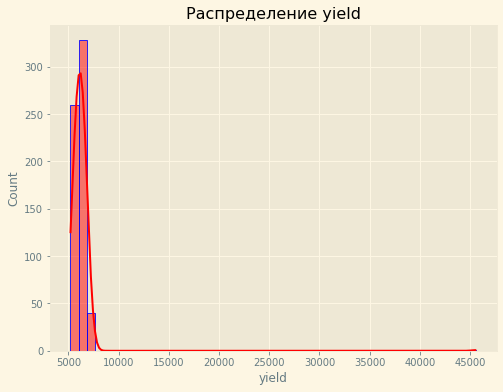

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: yield, dtype: float64

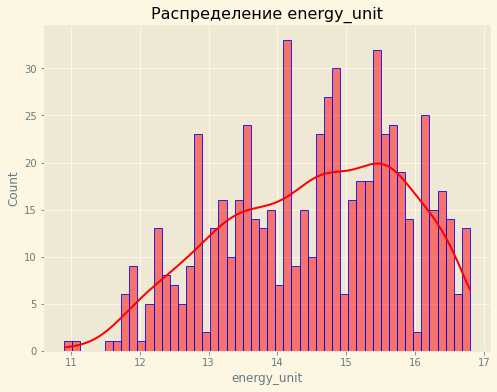

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_unit, dtype: float64

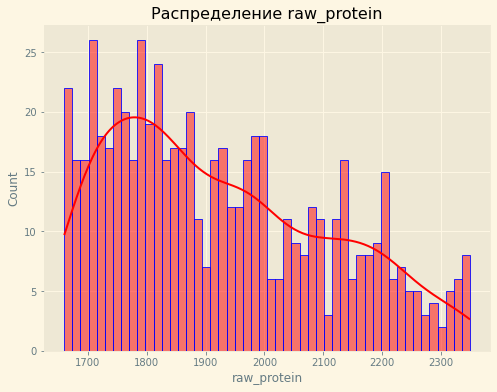

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: raw_protein, dtype: float64

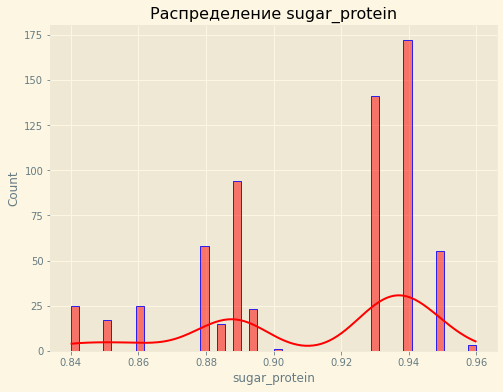

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein, dtype: float64

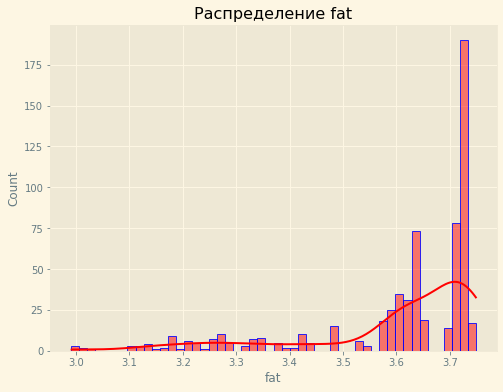

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat, dtype: float64

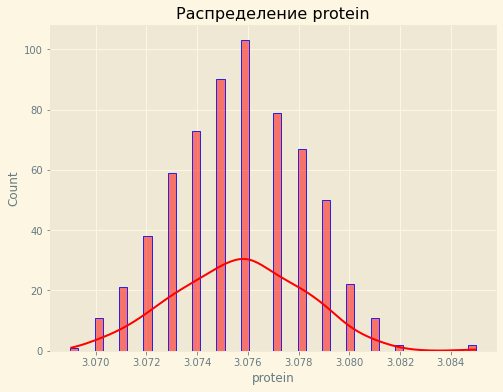

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

In [ ]:
plt.style.use('Solarize_Light2')

# Построение графиков для количественных признаков
for sign in quantitative_trait:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_main[sign], kde=True, color='red', edgecolor='blue', bins=50)
    plt.title(f'Распределение {sign}')
    plt.show()
    display(df_main[sign].describe())

<b> Вывод: </b>

Удой:
- В данных явно присутствуют выбросы, при среднем и медиане около 6к, максимум в 45к выглядит неуместно, значения значительно выше 75% удалю из дальнейшего анализа

Питательность корма:
- Странно что питательность различается, может на ферме пробуют разные корма, данные смещены вправо, аномалий иил сильных выбросов не наблюдается

Сырой протеин в корме:
- График распределения смещён влево, без аномалий

Отношение сахара к протеину в корме:
- Распередление не совсем нормальное, присутствуют скачки в значениях, но сам разброс чисел от медианы и среднего незначителен

Жирность молока:
- График сильно смещён влево, минимальные значения от среднего и пика не критично отличаются, количество значений небольшой жирности низкое

Процент содержания белка в молоке:
- Нормальное распределение без ярких выбросов или аномалий

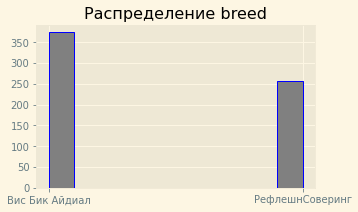

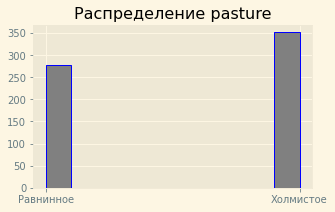

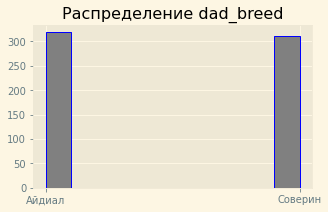

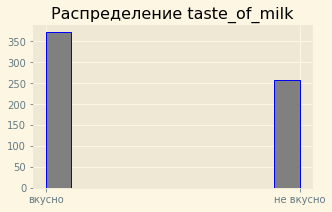

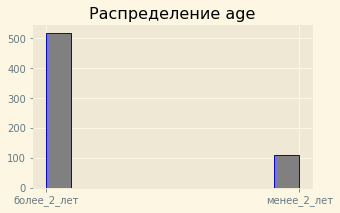

In [ ]:
# Построение графиков для категориальных признаков
for sign in categorical_trait:
    plt.figure(figsize=(5, 3))
    plt.hist(df_main[sign], color='grey', edgecolor='blue')
    plt.title(f'Распределение {sign}')
    plt.show()

<b> Вывод: </b>

Категориальные значения распределены почти в равном соотношении, но в столбцах:

- Явная бимодальность в данных. Т.е. надо углубляться в анализы подгрупп, прежде чем делать какие-то выводы.

- Есть супервыброс по удою. Остальные точки на "ящиках с усами" - можно считать приемлимыми значениями на данном этапе. При моделировании (когда будем выполнять анализ остатков) посмотрим детальнее.

- Факторы Спо и жирность: есть подозрение, что его лучше перевести в категориальную шкалу, т.к. есть большая ассиметрия - скорее всего тут прячутся две-три группы.

- Возраст. Практически в 5 раз коровы живущие более 2 лет превосходят "молодых"

- Вкус молока. Около 250 коров из 600 рассматриваемых получили негативную оценку вкуса


In [ ]:
#Удаление обнаруженных выбросов
df_main = df_main.loc[df_main['yield'] <= 8000]

## Шаг 4. Проведение корреляционного анализа признаков в датасете

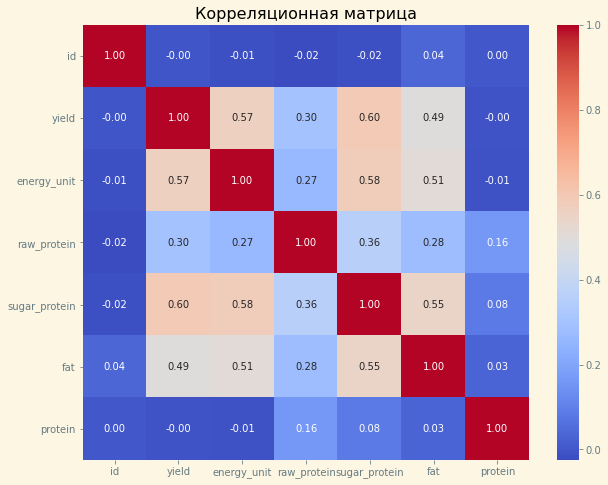

In [ ]:
#Тепловая карта с корреляцией колич. признаков
plt.figure(figsize=(10, 8));
sns.heatmap(df_main.corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f');
plt.title('Корреляционная матрица');

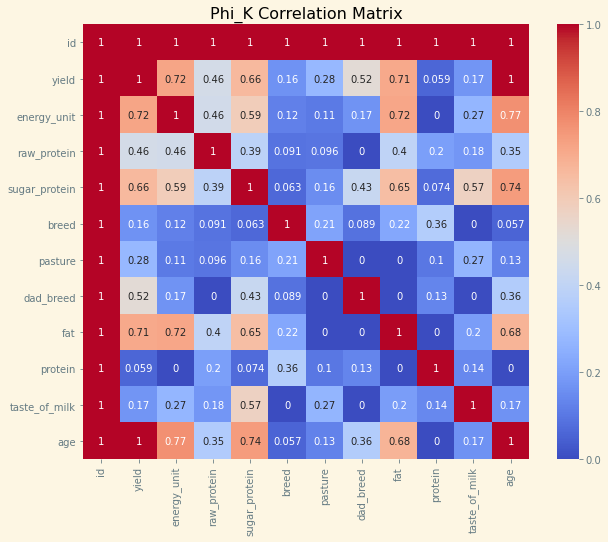

In [ ]:
#Список интервальных столбцов для phik
interval_columns = ['yield', 'energy_unit', 'raw_protein', 'sugar_protein', 'fat', 'protein']

# Вычисление матрицы корреляции с использованием phik
corr_matrix = df_main.phik_matrix(interval_cols=interval_columns)

#Построение
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable taste_of_milk for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable taste_of_milk for analysis 1. Dropping this column
  warnings.warn(


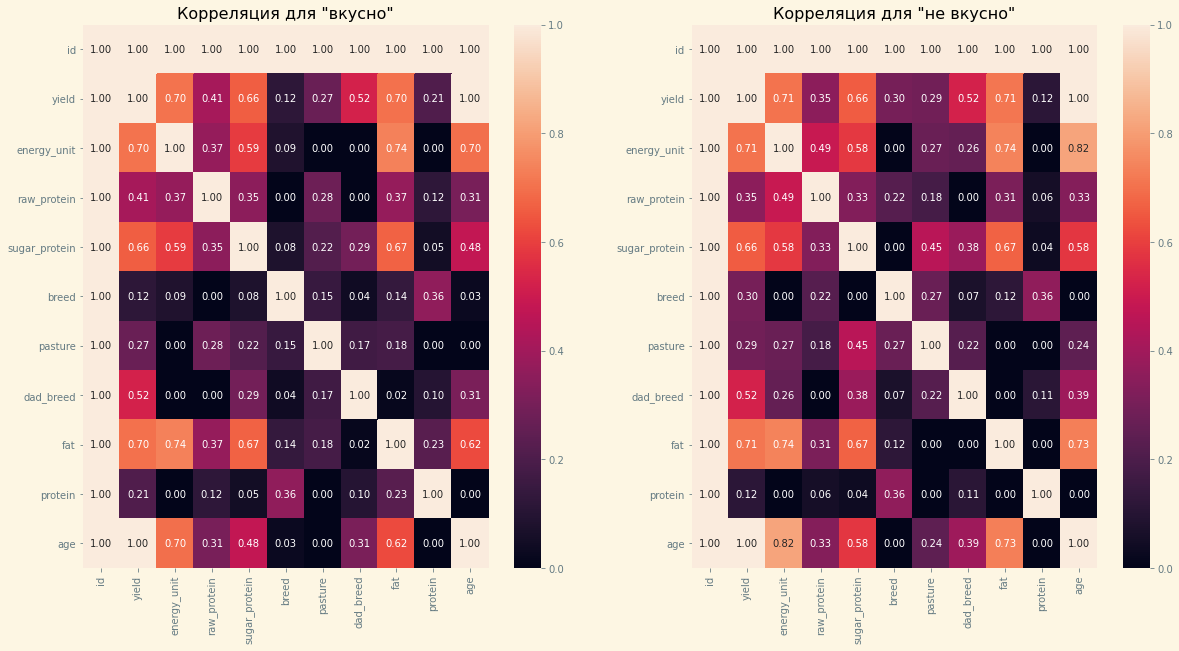

In [ ]:
#Фильтрация
df_good = df_main[df_main['taste_of_milk'] == 'вкусно']
df_bad = df_main[df_main['taste_of_milk'] == 'не вкусно']

#Построение
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(df_good.phik_matrix(interval_cols=interval_columns), annot=True, fmt=".2f")
plt.title('Корреляция для "вкусно"')
plt.subplot(1, 2, 2)
sns.heatmap(df_bad.phik_matrix(interval_cols=interval_columns), annot=True, fmt=".2f")
plt.title('Корреляция для "не вкусно"')
plt.subplots_adjust(wspace=0.2)
plt.show();

<b> Вывод: </b>

Самые коррелирующие значения с интересующим нас удоем:
- В первую очередь это кормовые характеристики (энергетическая ценность, соотношения сахара к белку, количество сырого белка)
- Казалось-бы как связана жирность молока и объём удоев, но связь присутствует

По имеющейся тепловой карте можно заключить, что на удои влиет все (кроме id и количества белка в молоке)

/tmp/ipykernel_257/2054382426.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


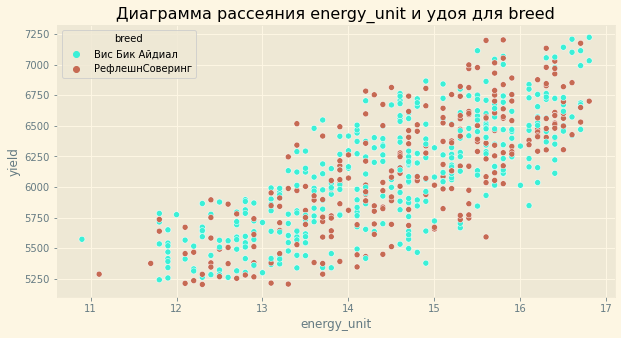

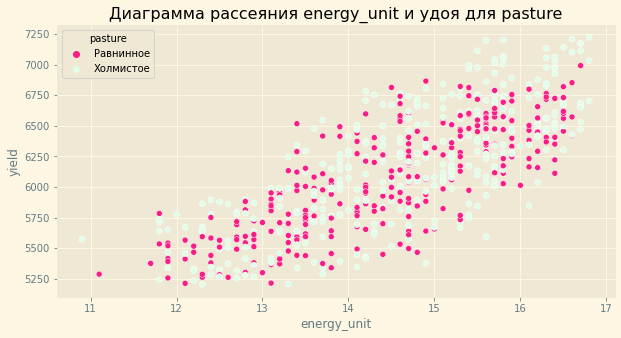

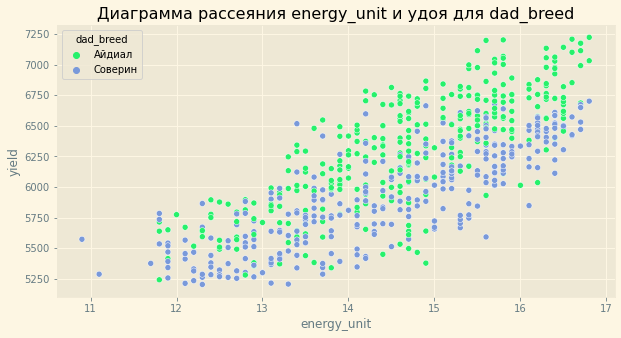

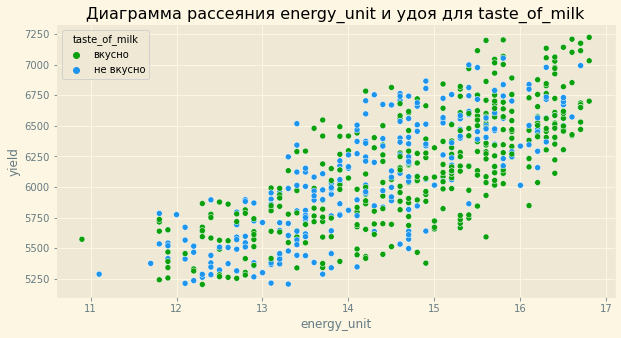

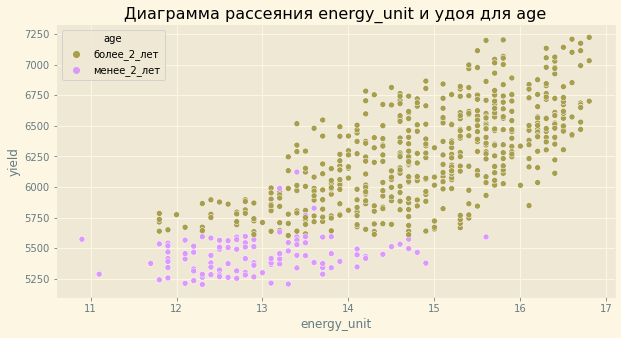

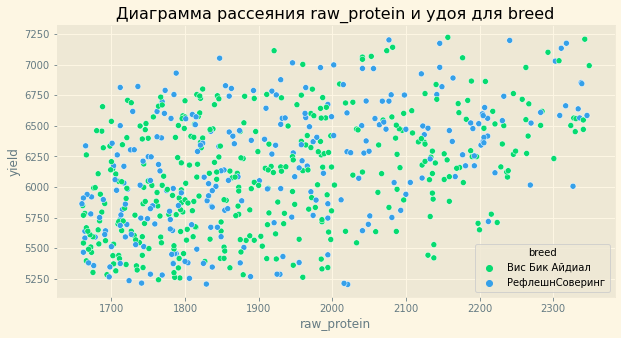

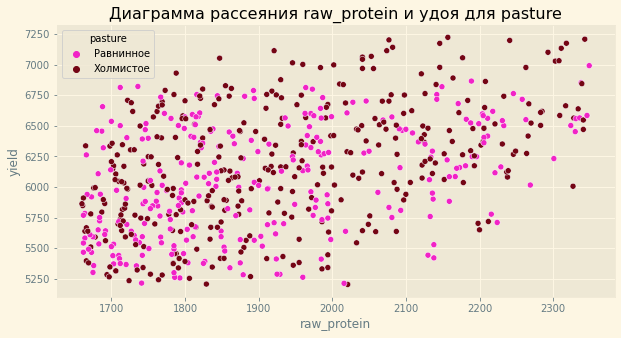

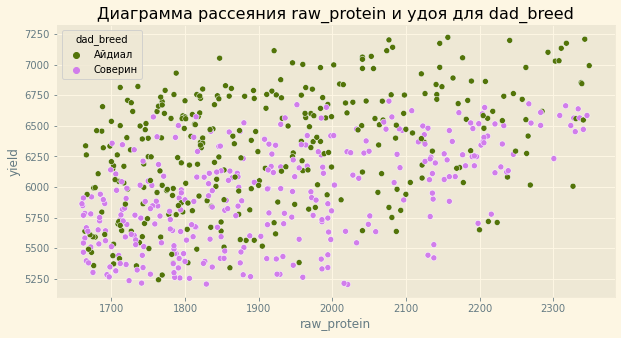

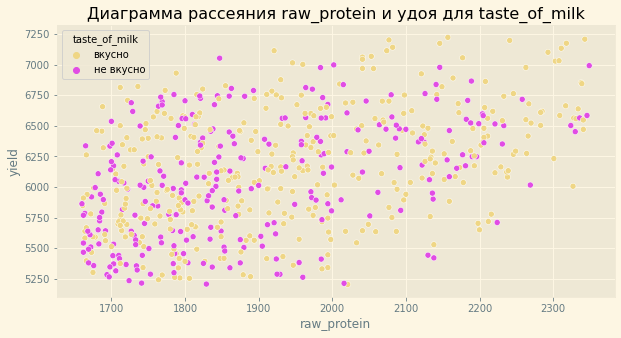

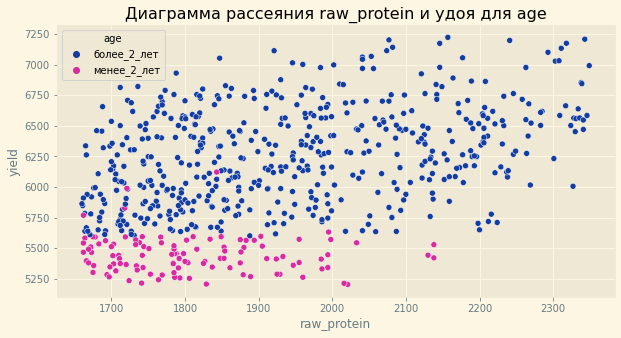

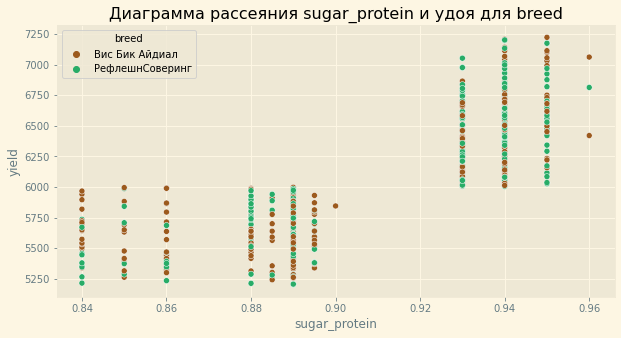

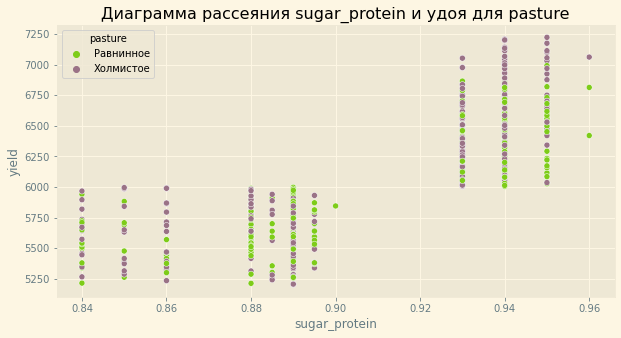

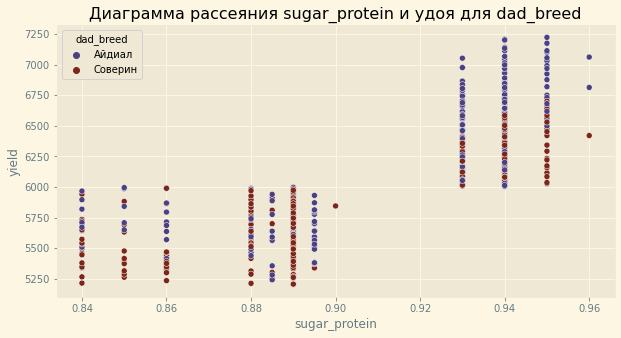

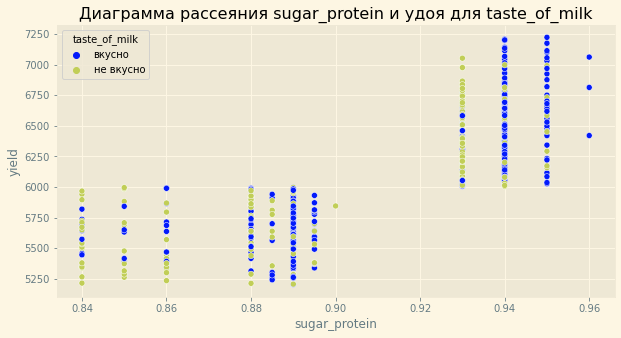

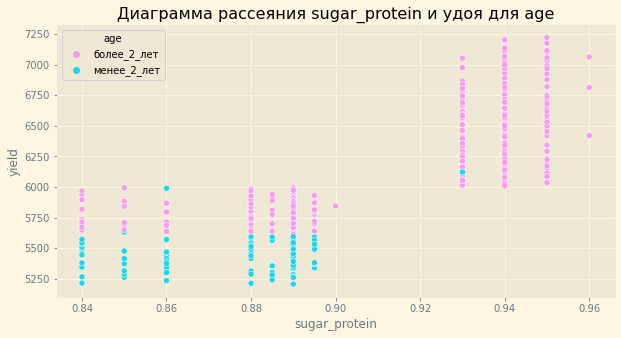

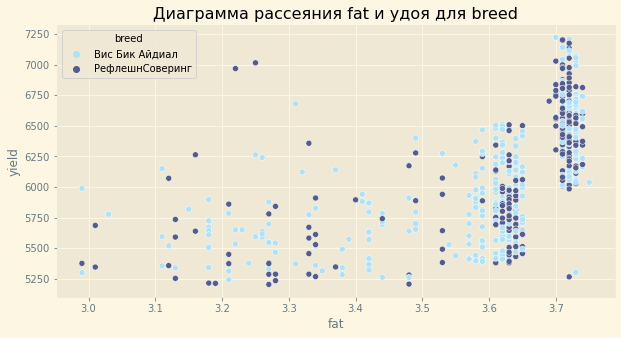

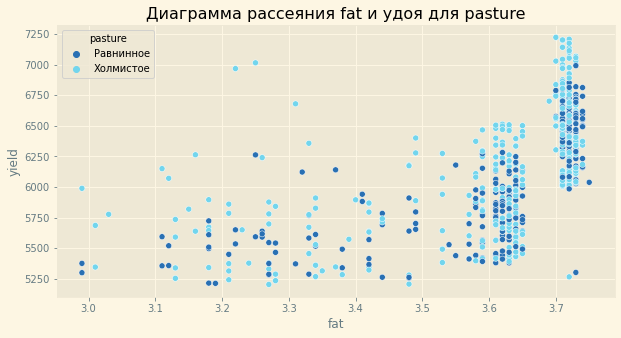

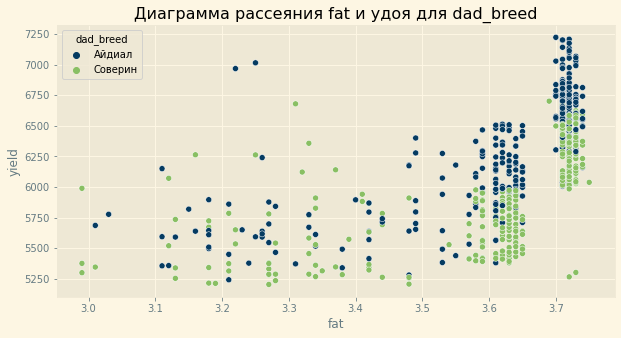

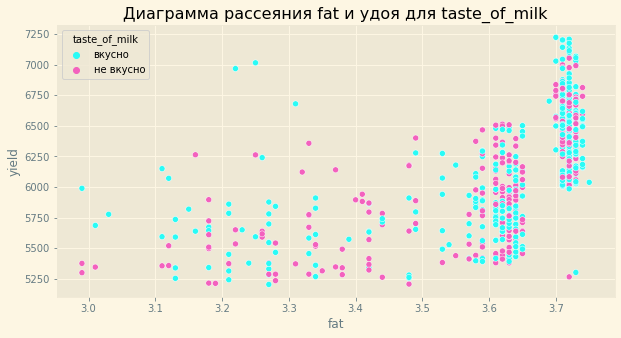

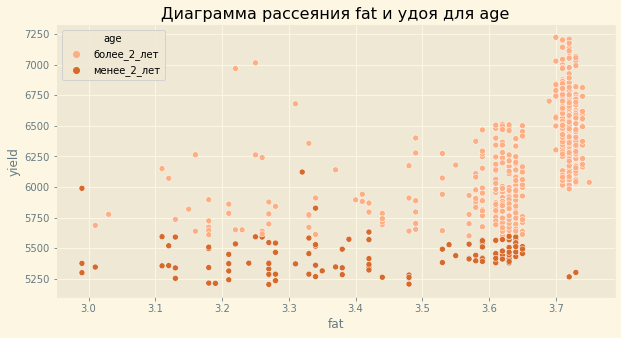

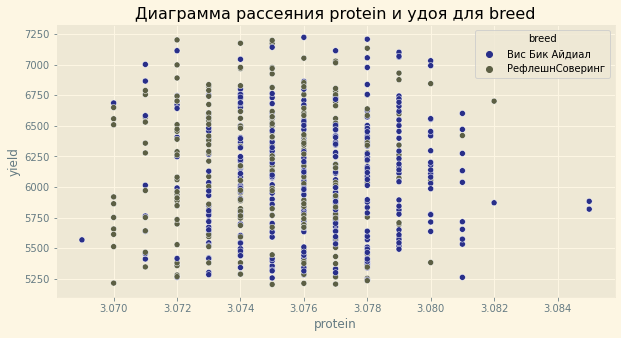

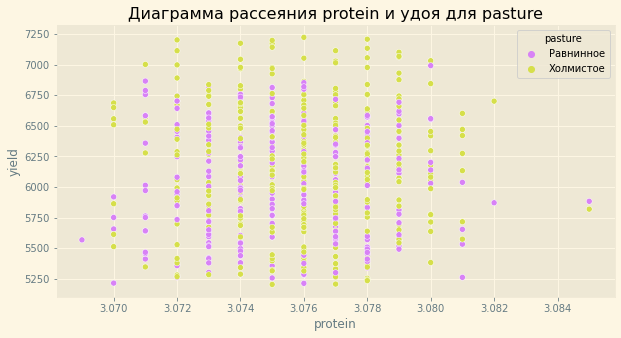

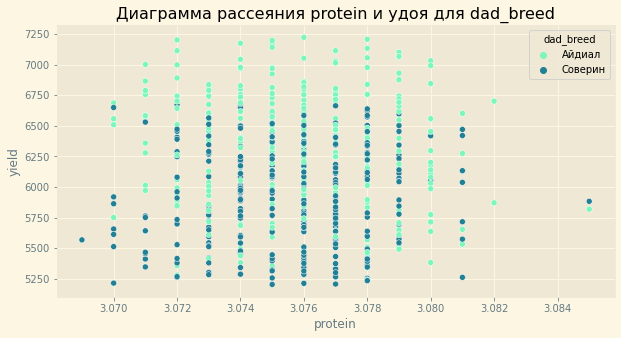

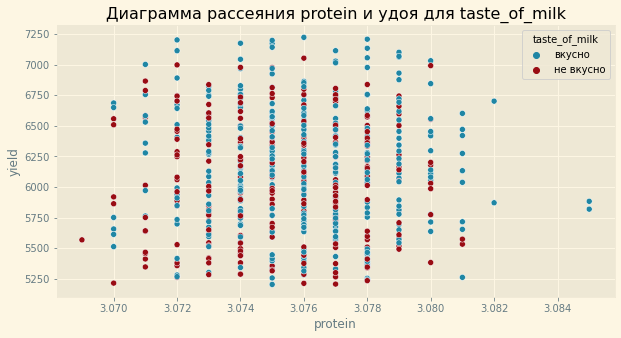

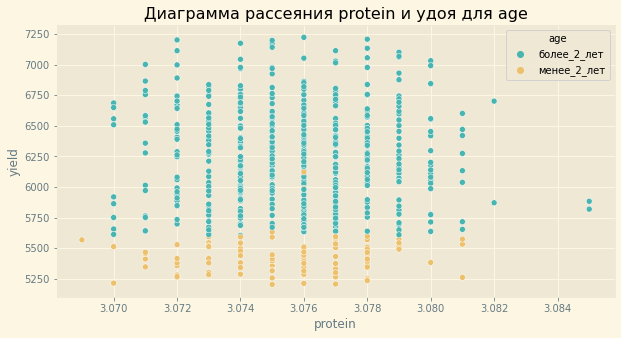

In [ ]:
#Корректирую список количественных столбцов
quantitative_trait = ['energy_unit', 'raw_protein', 'sugar_protein', 'fat', 'protein']

#Создам функцию для вывода диаграммы рассеяния по количественным признакам
for feature in quantitative_trait:
  #Добавлю ещё один цикл для прохода по каждому категориальному значению датафрейма
 for trait in categorical_trait:
  #Диаграмм получится много, чтобы они не сливались добавлю случайный цвет для каждой из них
   colors = [(random.random(), random.random(), random.random()) for _ in range(2)]
   plt.figure(figsize=(10, 5))
   sns.scatterplot(x=feature, y='yield', hue=trait, palette=colors, data=df_main)
   plt.title(f'Диаграмма рассеяния {feature} и удоя для {trait}')

<b> Вывод: </b>

- Можем сказать, что выводы теже, что и в пункте выше: есть не линейность с спо и жирностью во всех группах. Однозначно стоит создавать новые факторы.

- Дополнительный вывод: в группах "порода_папы_быка" разный уровень корреляции по всем факторам. Т.е. есть отличия от корреляции по всей таблице. Скорее всего, "папа" сильнее влияет на удой, чем остальные факторы. Но посмотрим это уже в модели.

- По мультиколлинеарности: скорее нет (нет узкого облака). Т.к. графически мало что изменилось. Единственное, возможно иная зависимость между целевой и эке. Проверим это.

- Отлично видно, что возраст влият на удой. Более молодые коровы меньше дают молока.

- Видно, что спо только для возрастных коров используется.


## Шаг 5. Задача регрессии

In [ ]:
#Список для удаления входных признаков, белок в молоке выбрал из-за низкой corr
incoming_signs = ['yield', 'id', 'protein', 'taste_of_milk', 'fat']

#Списки категориальных и количественных значений для обучения
cat_col_names = ['breed', 'pasture', 'dad_breed', 'age']
num_col_names = ['energy_unit', 'raw_protein', 'sugar_protein']

In [ ]:
#Функция для выполнения предобработки данных и обучения модели
def linear_regression_model(cat_col_names, num_col_names):
    X = df_main.drop(incoming_signs, axis=1)
    y = df_main['yield']

    #Разбивка на выборки
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42)

    #Кодирование категориальных значений в выборках
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    #Атрибут для кодировщика
    try:
      encoder_col_names = encoder.get_feature_names_out(cat_col_names)
    except AttributeError:
      encoder_col_names = encoder.get_feature_names(cat_col_names)

    #Масштабирование количественных значений
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    #Создание датафреймов с категориальными обработанными данными
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    #Создание датафреймов с количественными данными
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    #Объединение всех преобразованных данных в тестовый и тренировочный датафреймы
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    #Обучение модели и получение предсказаний на тестовых данных
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    #Расчёт остатков
    residuals = y_test - predictions

    #Расчёт интересубщих метрик: R2, MSE, MAE, RMSE
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = sqrt(mse)

    #Вывод метрик
    print('R2 =', r2.round(3))
    print('MSE =', mse.round(3))
    print('MAE =', mae.round(3))
    print('RMSE =', round(rmse, 3))
    #Графики по количественным признакам
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5));
    axes[0].hist(residuals, bins=40, color='red', edgecolor='blue')
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals, color='red', edgecolor='blue')
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show();

    return model_lr, encoder, scaler

R2 = 0.784
MSE = 43887.015
MAE = 164.242
RMSE = 209.492


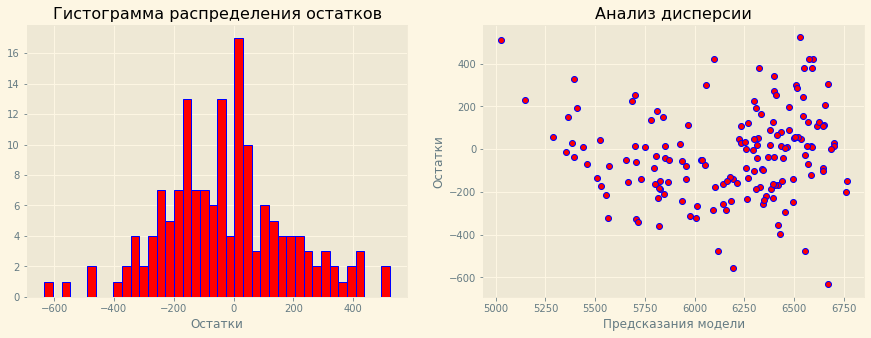

In [ ]:
#Вызов функции МО
model_lr, encoder, scaler = linear_regression_model(cat_col_names, num_col_names)


Гистограмма распределения остатков расположена равномерно влево, она относится к ненормальному распределению. Модель часто даёт слишком большие предсказания, её прогнозы больше истинных значений.

Анализ дисперсии выявил увеличение разброса ошибки при предсказании высоких значений удоя. Коров с удоем выше или равным среднему (6.1к) большая часть, но модель не научилась хорошо предсказывать их потенциал.

R2, в 79% случаев предсказание модели точнее, чем среднее значение удоев



Нужны дополнительные исследования для улучшения качества модели, устраню нелинейные связи связанные с соотношением сахара/белка, а также с энерг.ценностью корма

R2 = 0.818
MSE = 37030.911
MAE = 149.04
RMSE = 192.434


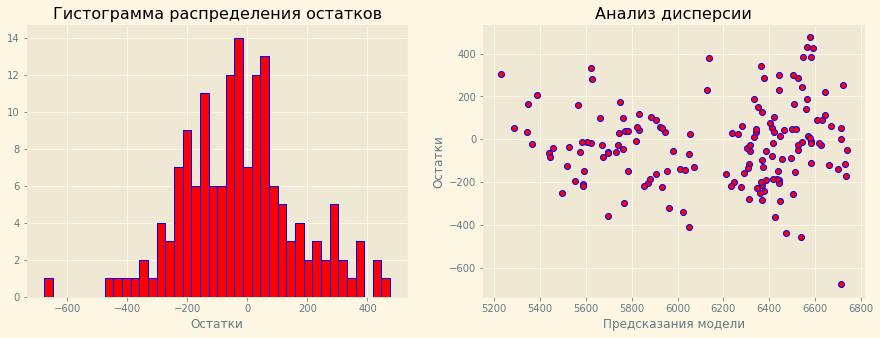

In [ ]:
df_buy['sugar_protein'] = df_main['sugar_protein'].median()*1.05
#Преобразование в бинарный признак
df_main['sugar_protein'] = (df_main['sugar_protein'] >= 0.92).astype(int)

#Возведение в квадрат
df_main['energy_unit'] = df_main['energy_unit'] ** 2

#Списки для второй модели
cat_col_names_2 = ['sugar_protein', 'breed', 'pasture', 'dad_breed', 'age']
num_col_names_2 = ['energy_unit', 'raw_protein']

model_lr_2, encoder_2, scaler_2 = linear_regression_model(cat_col_names_2, num_col_names_2)

- R2 увеличился на несколько пунктов

- Анализ остатков модели: дисперсия разброса ошибки стала стабильнее на всём диапазоне фактических данных. Наблюдаются две зоны ошибок. Но разница дисперсии ошибок не систематическая, а выборочная.

- Гистограма: среднее и медиана совпадают, но распределение не нормальное (бимодальности, плюс смещение среднего влево от нуля). Значит потенциал для улучшения модели всё ещё есть.

R2 = 0.825
MSE = 35673.89
MAE = 146.163
RMSE = 188.875


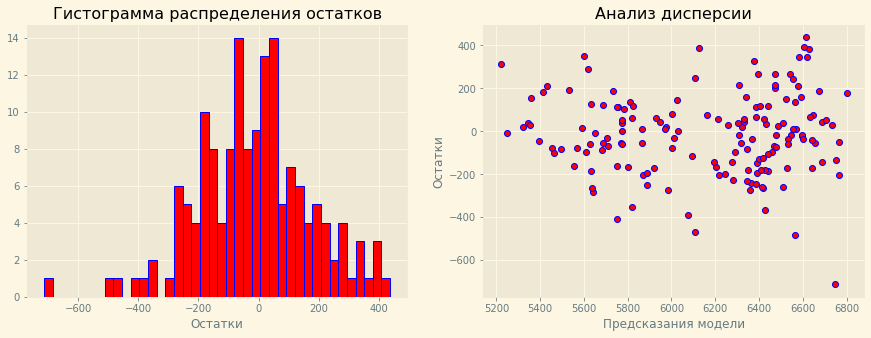

In [ ]:
#Ввод в таблицу новых данных для МО
df_main = pd.merge(df_main, df_dad, on='id')
cat_col_names_3 = ['sugar_protein', 'breed', 'pasture', 'dad_breed', 'age', 'name_dad']

model_lr_3, encoder_3, scaler_3 = linear_regression_model(cat_col_names_3, num_col_names_2)

<b> Вывод: </b>

R2 ещё увеличился, факторы на 82% объясняют разброс в целевой переменной

Анализ остатков модели: дисперсия разброса ошибки осталась стабильной. Есть около десятка  "выдающихся" точек на высоких удоях, но это не системно, а разовая акция. Можем признать, что ошибка равномерная на всём диапазоне значений. Т.е. остатки - гомоскедастичны. Значит модель можно использовать для прогноза.


In [ ]:
#Добавление недостающих данных
df_buy['energy_unit'] = df_main['energy_unit'].median()*1.05
df_buy['raw_protein'] = df_main['raw_protein'].median()*1.05

In [ ]:
#Преобразование в бинарный признак
df_buy['sugar_protein'] = (df_buy['sugar_protein'] >= 0.92).astype(int)

#Кодирование категориальных значений в выборках
df_buy_ohe = encoder_3.transform(df_buy[cat_col_names_3])

#Атрибут для кодировщика
try:
  encoder_col_names = encoder_3.get_feature_names_out(cat_col_names_3)
except AttributeError:
  encoder_col_names = encoder_3.get_feature_names(cat_col_names_3)

#Создание датафрейма с категориальными обработанными данными
df_buy_ohe = pd.DataFrame(df_buy_ohe, columns=encoder_col_names)

#Масштабирование количественных значений
df_buy_scaled = scaler_3.transform(df_buy[num_col_names_2])

#Создание датафрейма с количественными данными
df_buy_scaled = pd.DataFrame(df_buy_scaled, columns=num_col_names_2)

#Объединение всех преобразованных данных в датафрейм
df_buy_progn = pd.concat([df_buy_ohe, df_buy_scaled], axis=1)

In [ ]:
#Создание переменной с предсказанием модели
predicted_yield = model_lr_3.predict(df_buy_progn)

## Шаг 6. Задача классификации

In [ ]:
#Списки для модели классификации
cat_col_names_logic = ['sugar_protein', 'breed', 'pasture', 'dad_breed', 'age', 'name_dad']
num_col_names_logic = ['energy_unit', 'raw_protein', 'protein', 'fat']

incoming_signs = ['id', 'taste_of_milk']

accuracy = 0.631
recall = 0.864
precision = 0.623


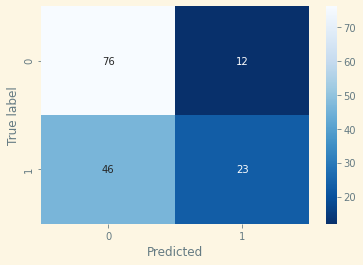

In [ ]:
#Функция для выполнения предобработки данных и обучения модели
def logic_model(cat_col_names, num_col_names, threshold):

  X = df_main.drop(incoming_signs, axis=1)
  y = df_main['taste_of_milk']

  #Разбивка на выборки
  X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  random_state=42)

  #Кодирование категориальных значений в выборках
  X_train_ohe = encoder_3.transform(X_train[cat_col_names])
  X_test_ohe = encoder_3.transform(X_test[cat_col_names])

  #Атрибут для кодировщика
  try:
    encoder_col_names = encoder_3.get_feature_names_out(cat_col_names_3)
  except AttributeError:
    encoder_col_names = encoder_3.get_feature_names(cat_col_names_3)

  #Масштабирование количественных значений
  #Из-за добавления новых кол.признаков заново обучаю скейлер
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train[num_col_names])
  X_test_scaled = scaler.transform(X_test[num_col_names])

  #Создание датафреймов с категориальными обработанными данными
  X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
  X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

  #Создание датафреймов с количественными данными
  X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

  #Объединение всех преобразованных данных в тестовый и тренировочный датафреймы
  X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
  X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

  #Обуячение
  clf = LogisticRegression()
  clf = clf.fit(X_train, y_train)
  probabilities = clf.predict_proba(X_test)[:, 1]
  #Строка для сравнения порога и сведения буля к 0 и 1
  y_pred = (probabilities > threshold).astype(int)

  #Создание словаря для отката к 'вкусно' и 'не вкусно'
  label_mapping = dict(enumerate(clf.classes_))
  #Возвращение предсказаниям значений
  y_pred = [label_mapping[label] for label in y_pred]

  #Расчё1т интересующих метрик
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label='вкусно')
  precision = precision_score(y_test, y_pred, pos_label='вкусно')

  conf_mat = confusion_matrix(y_test, y_pred)

  print('accuracy =', accuracy.round(3))
  print('recall =', recall.round(3))
  print('precision =', precision.round(3))
  ax = sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues_r')
  plt.ylabel('True label')
  plt.xlabel('Predicted')
  plt.show();

  return clf, scaler

#Проверка модели и значений
clf, scaler_clf = logic_model(cat_col_names_logic, num_col_names_logic, 0.5)

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b> Вывод V3 </b>

- Критичнее всего при покупке коров ошибки 1 рода, когда модель не смогла верно дать позитивный прогноз (молоко оказалось не вкусным)

- В поставленной задаче важно не купить ни одной коровы класса 0 (не вкусное молоко), то есть ни одного истинно положительного ответа, поэтому подойдёт именно метрика Precision, чем выше Precision, тем точнее прогнозы типа Positive модель смогла дать верно.

Далее необходимо снизив порог классификации уменьшить количество предсказаний ошибочно не вкусного молока

</div>

accuracy = 0.465
recall = 0.045
precision = 1.0


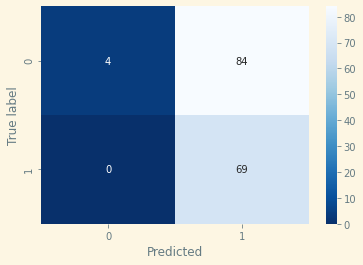

In [ ]:
#Вторая версия модели с изменённым порогом
clf_2, scaler_clf_2 = logic_model(cat_col_names_logic, num_col_names_logic, 0.18)

Теперь ошибки в предсказании вкусности молока минимальны

In [ ]:
#Масштабирование количественных значений
df_buy_scaled = scaler_clf_2.transform(df_buy[num_col_names_logic])

#Создание датафрейма с количественными данными
df_buy_scaled = pd.DataFrame(df_buy_scaled, columns=num_col_names_logic)

#Объединение всех преобразованных данных в датафрейм
df_buy_progn = pd.concat([df_buy_ohe, df_buy_scaled], axis=1)

#Создание переменной с прогнозом модели
predicted_taste_of_milk = clf.predict(df_buy_progn)

## Шаг 7. Итоговые выводы




In [ ]:
#Добавление прогнозов в датафрейм для покупки
df_buy['predicted_taste_of_milk'] = predicted_taste_of_milk
df_buy['predicted_yield'] = predicted_yield

#Создание отфильтрованного с учётом прогнозов датафрейма
df_buy_pred = df_buy[(df_buy['predicted_taste_of_milk'] == 'вкусно') & (df_buy['predicted_yield'] >= 6000)]

#Результат прогнозов
print('С минимальным риском фермер может приобрести', len(df_buy_pred), 'коров')

С минимальным риском фермер может приобрести 14 коров


Работа моделей:
- Первая модель (модель линейной регрессии) находит линейные зависимости между данными фермы и количеством удоев. После обучения и настройки делает прогнозы на основе входящих данных "ЭкоФермы"
- Вторая модель (модель логистической регрессии) связывает входящие признаки с конкретным классом (вкусно и не вкусно) моделируя его вероятность

Риск при покупке для фермера минимален из-за низкой вероятности ошибки моделей, плюс средний удой и так переваливает за необходимую отметку в 6 к, а вкусность молока положительна за счёт сведения к минимуму ошибок в предсказании того, что оно вкусное

Выводы о моделях линейной регрессии и логистической регрессии:
- Линейная регрессия используется для предсказания непрерывной зависимой переменной, тогда как логистическая регрессия применяется для предсказания бинарной зависимой переменной.
- Линейная регрессия пытается найти линейную зависимость между предикторами и целевой переменной, в то время как логистическая регрессия моделирует вероятность принадлежности к определенному классу.

Способы улучшения качества регрессионной модели, которые использовались в проекте:
- Добавление новых информативных признаков или изменение/удаление старых.
- Очистка данных от выбросов и обработка пропущенных значений.
- Применение разныъ порогов классификации.

Возможность улучшения результатов регрессионной модели:
- Добавить новые признаки

Метрики моделей классификации важные при анализе рисков или экономических расчетов:
- Accuracy - показывает долю правильно классифицированных образцов.
- Precision - показывает точность правильно предсказанных положительных образцов среди всех предсказанных положительных образцов.
- Recall - показывает долю правильно предсказанных положительных образцов среди всех истинно положительных образцов.

<b> Вывод: </b>

- Выполнена предобработка данных
- Проведён исследовательский и корреляционный анализ признаков
- С учётом качества молока и планом развития молочного ъозяйства разработаны модели МО, которые помогут владельцу "Вольного луга" управлять рисками и принимать объективное решение при покупке бурёнок, чтобы расширить поголовье стада коров.